## **Exploration and Preprocessing on Music x Mental Health Dataset**
<br>This notebook contains code logic that will help us analyze, clean, and narrow down to relevant features we want to use for observing co-occurences in the dataset.

In [20]:
# import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Initial Data Exploration and Analysis
<br> Initial exploration and analysis of data will help us determine features we want to focus on. Since the dataset is very sparse (which is natural for a survey, real-world data), to get a meaningful and observable co-occurence, we need to narrow down to only relevant features.

In [21]:
df = pd.read_csv("../data/mxmh_survey_results.csv")
print(df.shape)
print(df.info())
df.head()


(736, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


### Most Common Favorite Genres

/var/folders/0s/6wvwyddj1fdctxh3vmlllqv40000gn/T/ipykernel_56372/3986650057.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


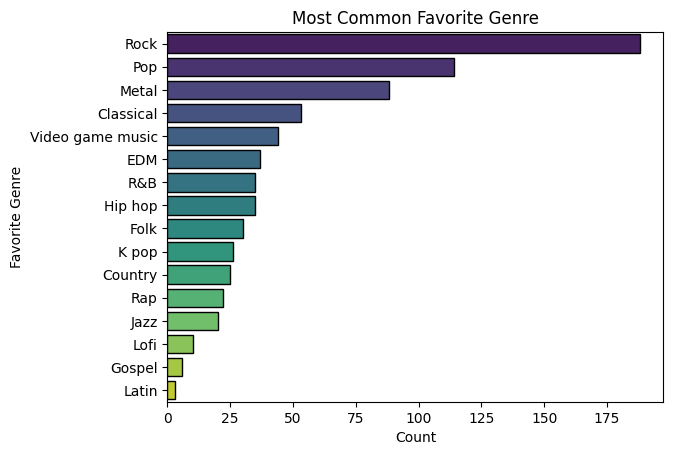

In [22]:
sns.countplot(
    data=df,
    y="Fav genre",
    order=df['Fav genre'].value_counts().index, 
    palette="viridis",
    edgecolor="black"
)

plt.title("Most Common Favorite Genre")
plt.xlabel("Count")
plt.ylabel("Favorite Genre")
plt.show()

As visualized above, Rock is the clear favorite genre, chosen by roughly more than 25% of the population, followed by Pop and Metal. Lofi, Gospel, and Latin music show extremely low engagement, with their collective popularity remaining below 0.14%.

### Mental Health Variables

array([[<Axes: title={'center': 'Anxiety'}>,
        <Axes: title={'center': 'Depression'}>],
       [<Axes: title={'center': 'Insomnia'}>,
        <Axes: title={'center': 'OCD'}>]], dtype=object)

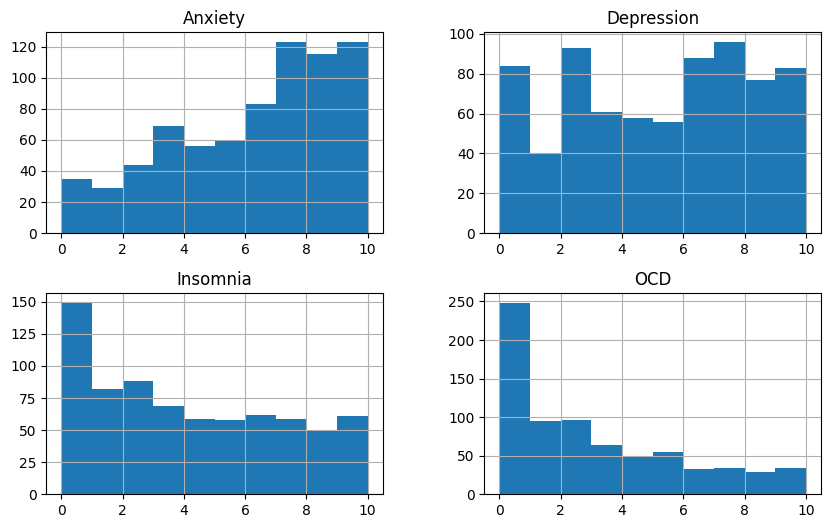

In [23]:
mental_cols = ["Anxiety", "Depression", "Insomnia", "OCD"]

df[mental_cols].hist(figsize=(10,6))


In [24]:
m_all = ["Anxiety", "Depression", "Insomnia", "OCD"]


for disorder in m_all:
    d_avg = str(round(df[disorder].mean(), 2))
    print(disorder + ' average: ' + d_avg)

Anxiety average: 5.84
Depression average: 4.8
Insomnia average: 3.74
OCD average: 2.64


The mental health ranking data shows `depression` and `anxiety` share elevated average rankings (5 and 6) and a concerning trend where popularity increases as severity rankings rise. 

<br>For depression, a concerning observation is the higher likelihood of individuals self-ranking at high ranges (8-10) compared to the minimum (0). In contrast, insomnia is moderately common and fairly distributed across non-zero rankings, but its popularity generally declines as rankings increase, while OCD is the least common disorder, characterized by a mode at rank 0, and similarly demonstrates a decrease in popularity as severity rankings rise.

### Music Effects

/var/folders/0s/6wvwyddj1fdctxh3vmlllqv40000gn/T/ipykernel_56372/1030474619.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('plasma', num_slices)


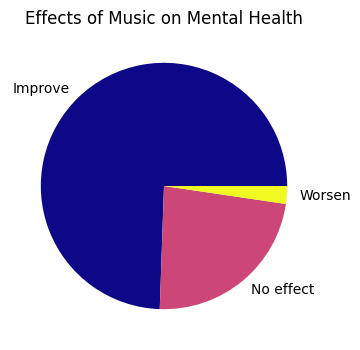

In [25]:
effects = df['Music effects'].value_counts()
plt.figure(figsize=(5,4))
num_slices = len(effects)
colors = plt.cm.get_cmap('plasma', num_slices)
plt.title('Effects of Music on Mental Health')




effects.plot(kind='pie', colors = colors.colors, ylabel= '');

In [26]:
effects

Music effects
Improve      542
No effect    169
Worsen        17
Name: count, dtype: int64

The majority of respondents find that music has a positive impact on their mental health.

## Preprocessing 
<br>*(Drop irrelevant columns and manage missing and numerical values)*

In [27]:
DROP_COLS = [
    "Timestamp",
    "Primary streaming service",
    "Age",
    "Exploratory",
    "Foreign languages",
    "While working",
    "Instrumentalist",
    "Composer",
    "BPM",
    "Permissions"
]

df = df.drop(columns=[c for c in DROP_COLS if c in df.columns])

FREQ_COLS = [c for c in df.columns if c.startswith("Frequency [")]

for col in FREQ_COLS:
    df = df.drop(columns=[c for c in FREQ_COLS if c in df.columns])

The decision to drop the said columns are due to my understanding of the effects of these features to dataset sparsity:

| Feature | Data Type / Issue | Justification for Dropping (Sparsity Avoidance) |
| :--- | :--- | :--- |
| **Timestamp** | High Cardinality | These are unqiue timestamps for when the individual took the survey. Not relevant and will just introduce sparsity |
| **Age** & **BPM** | Continuous / Numerical | Require careful binning. Poor binning choices (too many bins or uneven distributions) introduce sparse itemsets and will just widen the itemsets' dimensions, and this hinders drawing meaningful rules |
| **Primary streaming service** | High/Moderate Cardinality (Not relevant) | Spotify has an overwhelming mode. The column also lacks power or relevance to other columns, therefore will just add unnecessary sparsity to the itemsets |
| **Exploratory, Foreign languages, While working, Instrumentalist, Composer** | Binary / Low Frequency | These are expected to have **low support** (meaning it has 'No' values) + add unnecesssary sparsity to the itemsets |
| **Permissions** | Zero variance | By default, all individuals in the dataset would have to give permission to the survey in order for the dataset to be created.|

Additionally, the `Frequency [genre]` columns were dropped as well due to very high dimensionality. This is just according to my judgement to satisfy the requirements of Apriori transactional encoding, cleaner itemsets, and mitigate the risk of multicollinearity.

Although, this can be explored further in future works.

In [28]:
df.head()

,Hours per day,Fav genre,Anxiety,Depression,Insomnia,OCD,Music effects
0,3.0,Latin,3.0,0.0,1.0,0.0,NaN
1,1.5,Rock,7.0,2.0,2.0,1.0,NaN
2,4.0,Video game music,7.0,7.0,10.0,2.0,No effect
3,2.5,Jazz,9.0,7.0,3.0,3.0,Improve
4,4.0,R&B,7.0,2.0,5.0,9.0,Improve


In [29]:

MENTAL_COLS = ["Anxiety", "Depression"]
DROP_MENTAL_COLS = ['Insomnia', 'OCD']

for col in MENTAL_COLS:
    df[f"{col}"] = df[col] >= 4

for col in DROP_MENTAL_COLS:
    df = df.drop(columns=[c for c in DROP_MENTAL_COLS if c in df.columns])



Based on the initial findings, which clearly shows **Depression and Anxiety** as the dominant variables in the self-ranking data, we have strategically chosen to narrow the scope for the Apriori and transaction encoding phase. 

<br>The low frequency and dispersed nature of rankings for other variables ( Insomnia and OCD) would lead to a severely sparse transactional dataset.

In [30]:
df.head()

,Hours per day,Fav genre,Anxiety,Depression,Music effects
0,3.0,Latin,False,False,NaN
1,1.5,Rock,True,False,NaN
2,4.0,Video game music,True,True,No effect
3,2.5,Jazz,True,True,Improve
4,4.0,R&B,True,False,Improve


### Checking for columns with null values

In [31]:
df.isna().sum().sort_values(ascending=False)

Music effects    8
Hours per day    0
Fav genre        0
Anxiety          0
Depression       0
dtype: int64

In [32]:
# check mode value in category with missing values
print(df['Music effects'].mode())

0    Improve
Name: Music effects, dtype: object


In [33]:
# fill missing music effect values with mode ("Improve")
df['Music effects'] = df['Music effects'].fillna(df['Music effects'].mode()[0])
df.head()

,Hours per day,Fav genre,Anxiety,Depression,Music effects
0,3.0,Latin,False,False,Improve
1,1.5,Rock,True,False,Improve
2,4.0,Video game music,True,True,No effect
3,2.5,Jazz,True,True,Improve
4,4.0,R&B,True,False,Improve


In [34]:
# bin listening hours per day to 2 categories
bins = [-np.inf, 4, np.inf]
labels = ['Low-Medium', 'High Hours']
df['Hours per day'] = pd.cut(df['Hours per day'], bins=bins, labels=labels, right=False)


df.head()

,Hours per day,Fav genre,Anxiety,Depression,Music effects
0,Low-Medium,Latin,False,False,Improve
1,Low-Medium,Rock,True,False,Improve
2,High Hours,Video game music,True,True,No effect
3,Low-Medium,Jazz,True,True,Improve
4,High Hours,R&B,True,False,Improve


We reduce the listening hours to 2 main categories (again, to reduce saprsity)

In [35]:
# reduce fave genre to only top 12 + 'Other'

top_genres = df["Fav genre"].value_counts().nlargest(12).index

df["Fav_genre_clean"] = df["Fav genre"].apply(
    lambda x: x if x in top_genres else "Other"
)

df = df.drop(columns=["Fav genre"])


In [36]:
print(df.shape)
df.head()

(736, 5)


,Hours per day,Anxiety,Depression,Music effects,Fav_genre_clean
0,Low-Medium,False,False,Improve,Other
1,Low-Medium,True,False,Improve,Rock
2,High Hours,True,True,No effect,Video game music
3,Low-Medium,True,True,Improve,Other
4,High Hours,True,False,Improve,R&B


### From 33 columns, we narrowed down to 7 final columns to make our transactional CSV and one-hot encoding.


In [37]:
transactions = []

for _, row in df.iterrows():
    items = []
    
    items.append(f"{row['Fav_genre_clean']}")  
    
    items.append(f"{row['Hours per day']}") 
    
    # mental health conditions (include either Present or Absent)
    for col in ['Anxiety', 'Depression']:
        if row[col]:
            items.append(f"{col}_Present")
        else:
            items.append(f"{col}_Absent")
    
    items.append(f"{row['Music effects']}")
    
    transactions.append(items)

In [38]:
with open("../data/transactions.csv", "w", newline="") as f:
    for t in transactions:
        f.write(",".join(t) + "\n")

## Converting Transactions CSV to One-hot Encoded

In [39]:
from mlxtend.preprocessing import TransactionEncoder

with open('../data/transactions.csv', 'r') as f:
    transactions = [line.strip().split(',') for line in f]

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_onehot = pd.DataFrame(te_array, columns=te.columns_)

print("DataFrame Head")
print(df_onehot.head())


DataFrame Head
   Anxiety_Absent  Anxiety_Present  Classical  Country  Depression_Absent  \
0            True            False      False    False               True   
1           False             True      False    False               True   
2           False             True      False    False              False   
3           False             True      False    False              False   
4           False             True      False    False               True   

   Depression_Present    EDM   Folk  High Hours  Hip hop  ...  Low-Medium  \
0               False  False  False       False    False  ...        True   
1               False  False  False       False    False  ...        True   
2                True  False  False        True    False  ...       False   
3                True  False  False       False    False  ...        True   
4               False  False  False        True    False  ...       False   

   Metal  No effect  Other    Pop    R&B    Rap   Rock  Vid

In [40]:
output_path = '../data/transactions_onehot.csv'

df_onehot.to_csv(
    output_path,
    index=False
)

## Exploring and Visualizing One-hot Encoded Data Using Pareto Chart

/var/folders/0s/6wvwyddj1fdctxh3vmlllqv40000gn/T/ipykernel_56372/4229551207.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(item_support.index, rotation=90)


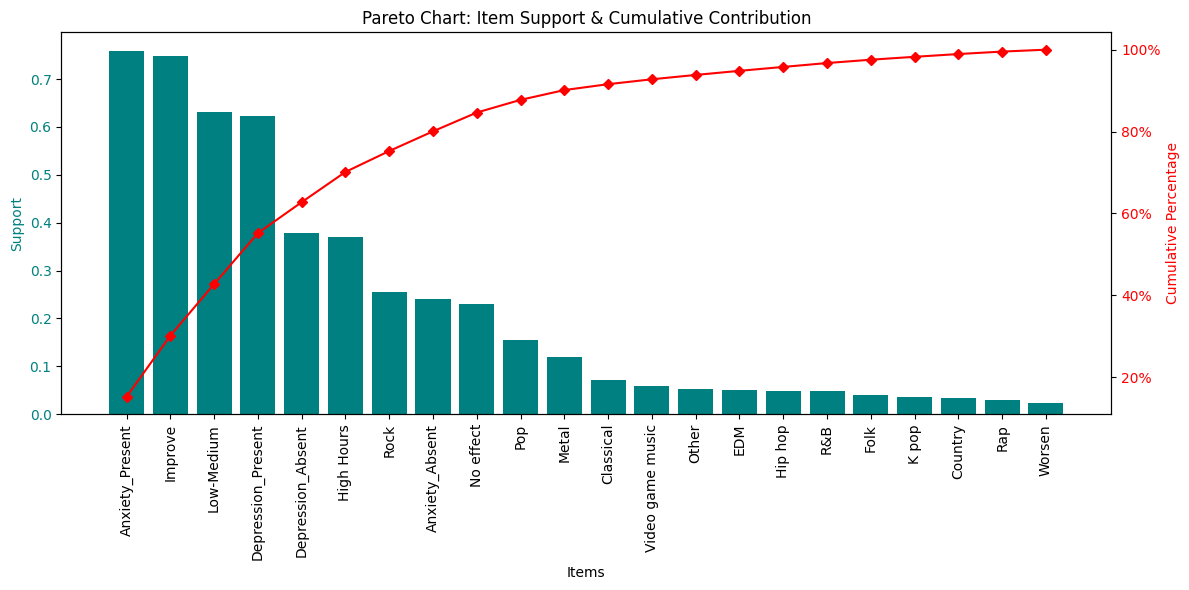

In [41]:
from matplotlib.ticker import PercentFormatter

item_support = df_onehot.mean().sort_values(ascending=False)
cumulative_percent = item_support.cumsum() / item_support.sum() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(item_support.index, item_support.values, color="teal")
ax1.set_xlabel("Items")
ax1.set_ylabel("Support", color="teal")
ax1.tick_params(axis='y', labelcolor="teal")
ax1.set_xticklabels(item_support.index, rotation=90) 

# line plot (for cumulative percentage)
ax2 = ax1.twinx()
ax2.plot(item_support.index, cumulative_percent, color="red", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage", color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.title("Pareto Chart: Item Support & Cumulative Contribution")
plt.tight_layout()
plt.show()

After going through kinds of visualization, I went with the Pareto Chart due to its new and interesting representation,and the value of its information.

>To read this visualization of the one-hot encoded data, we'll have to look at the `Cumulative Percentage` first. Look for 80% and from there, trace a horizontal line until we hit the red line, then we'll drop to the x-axis to draw our 'vital few'.

*<p style="font-size: 10px;">Reference: https://statisticsbyjim.com/graphs/pareto-charts/</p>*

All the items to the left of  `Anxiety_Absent` are our "Core Items" which means most of our dataset's information are contained within these items. We can expect that our Top support Apriori Rules contain these items.